# Chapter 4: Model building for predictive analyses.
### In this step I am going to use Machine Learning models to build predictive models for average salary. This is the most important step in a data science project as it is very much important to select the correct model for our dataset to get the best predictions.

#### author: Vikas Bhadoria

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 1: Load data and select the important columns for our model building

In [4]:
df = pd.read_csv('Cleaned_Data_For_EDA&Models.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor_pytorch,R_jd,spark_jd,excel_jd,tableau_jd,aws_jd,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,1,1,0,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,0,1,1,0,0,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,0,1,0,0,data scientist,na,2728,3


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'Same_Location_as_HQ', 'age', 'python_jd',
       'tensor_pytorch', 'R_jd', 'spark_jd', 'excel_jd', 'tableau_jd',
       'aws_jd', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [7]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','Same_Location_as_HQ','age','python_jd','spark_jd','aws_jd','excel_jd','job_simp','seniority','desc_len']]

### Step 2: Get dummies of cat variables

In [9]:
df_dum = pd.get_dummies(df_model)
df_dum.shape
# So we have 178 columns now after taking the dummies.

(742, 178)

### Step 3: Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary',axis=1)
y = df_dum.avg_salary.values # better pratice to take the .values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\vikasbhadoria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vikasbhadoria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Step 4: Use statsmodels api to explore the data summary. 
##### What are statsmodels??
Statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator.

In [12]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           1.47e-94
Time:                        03:16:15   Log-Likelihood:                -3311.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6206      6.718      6.493      0.000      30.427      56.814
Rating                                                3.6072      1.937      1.862      0.063      -0.197       7.412
num_comp                                              2.2503      0.868      2.592      0.010       0.545       3.955
hourly                                              -36.5646      9.173     -3.986      0.000     -54.580     -18.549
employer_provided                                    31.3732     11.524      2.722      0.007       8.741      54.006
Same_Location_as_HQ                                   2.4864      2.619      0.949      0.343      -2.657       7.629
age                                                   0.0352      0.030      1.172      0.242      -0.024       0.094
python_jd                                             8.1375      2.523      3.225      0.001       3.182      13.093
spark_jd                                             -0.5710      2.920     -0.196      0.845      -6.307       5.165
aws_jd                                                1.1218      2.736      0.410      0.682      -4.251       6.495
excel_jd                                             -0.4049      2.268     -0.179      0.858      -4.858       4.049
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6113      8.629      1.577      0.115      -3.335      30.558
Size_1 to 50 employees                                1.1067      6.501      0.170      0.865     -11.660      13.874
Size_10000+ employees                                -2.8817      5.800     -0.497      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1362      3.878      1.582      0.114      -1.481      13.753
Size_201 to 500 employees                             2.2568      3.873      0.583      0.560      -5.350       9.864
Size_5001 to 10000 employees                         -3.8766      5.440     -0.713      0.476     -14.561       6.808
Size_501 to 1000 employees                            2.1829      4.059      0.538      0.591      -5.790      10.155
Size_51 to 200 employees                              4.2001      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8850     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6113      8.629      1.577      0.115      -3.335      30.558
Type of ownership_College / University                6.4226     17.739      0.362      0.717     -28.415      41.260
Type of ownersh

### Step 5: Using different Models(algorithms) for predicting the average salary. 
##### Starting with linear regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [16]:
lm = LinearRegression()
Neg_MAE = np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
print('The negative mean error by using a Linear Regression using its default parameters is: {}'.format(Neg_MAE))

The negative mean error by using a Linear Regression using its default parameters is: -20.766855128926704


##### The second model I want to test is the Lasso regression model

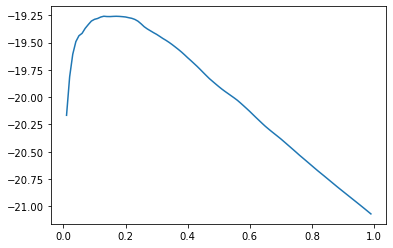

In [17]:
from sklearn.linear_model import Lasso

# selecting the best alpha value for Lasso
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [18]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]
## So the best value of alpha is 0.13 for my Lasso model. 

,alpha,error
12,0.13,-19.257798


In [21]:
lm_l = Lasso(alpha=0.13)
lm_l.fit(X_train,y_train)
Neg_MAE_Lasso = np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
print('The negative mean error by using a Lasso Regression using its best alpha value is: {}'.format(Neg_MAE_Lasso))

The negative mean error by using a Lasso Regression using its best alpha value is: -19.25779807999977


#### The third model I want to use is the XGboost model

In [22]:
from xgboost import XGBClassifier
# fit model no training data
Xgb = XGBClassifier()
Neg_MAE_Xgboost = np.mean(cross_val_score(Xgb,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

In [23]:
print('The negative mean error by using an XGboost model using its default parameters is: {}'.format(Neg_MAE_Xgboost))

The negative mean error by using an XGboost model using its default parameters is: -20.11158539711839


#### The final model I want to use is the most popular Random Forest.

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
Neg_MAE_RF = np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))
print('The negative mean error by using a Random Forest model using its default parameters is: {}'.format(Neg_MAE_RF))

C:\Users\vikasbhadoria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vikasbhadoria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


The negative mean error by using a Random Forest model using its default parameters is: -15.030826454049803


In [36]:
lm.fit(X_train, y_train)
lm_l.fit(X_train,y_train)
Xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

## Step 6: Comparing all the reuslts from all the 4 models clearly we can see that the Random Forest model is performing the best with MAE of -15.03

#### Now I will fine tune my Random Forest model. I will find the best parameters for RF using GridsearchCV.

In [29]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

#### The best score for Random forest using GridscerchCV is:-

In [32]:
gs.best_score_

-14.79254538554689

In [33]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=270, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Testing the predictions of all the 4 models against the test data.

In [39]:
rf_tuned = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=270, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=270, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_xgboost = Xgb.predict(X_test)
tpred_rf = rf_tuned.predict(X_test)

### Step 7: Final predictions for each model

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_xgboost)
mean_absolute_error(y_test,tpred_rf)
print('The Mean absolute error in Linear Regression Model is: {}'.format(mean_absolute_error(y_test,tpred_lm)))
print('The Mean absolute error in Lasso Regression Model is: {}'.format(mean_absolute_error(y_test,tpred_lml)))
print('The Mean absolute error in Xgboost Model is: {}'.format(mean_absolute_error(y_test,tpred_xgboost)))
print('The Mean absolute error in Random Forest Model is: {}'.format(mean_absolute_error(y_test,tpred_rf)))

The Mean absolute error in Linear Regression Model is: 18.855189990210473
The Mean absolute error in Lasso Regression Model is: 19.665303712749907
The Mean absolute error in Xgboost Model is: 12.936241610738255
The Mean absolute error in Random Forest Model is: 11.023987074322644


#### Combining 2 models together to see if we get better accuracy.

In [43]:
mean_absolute_error(y_test,(tpred_xgboost+tpred_rf)/2)

11.165759383544618

## Conclusion: Hence after using 4 different models the best accuracy is given by fine tuned Random forest. The Mean absolute error in fine tuned Random Forest Model is: 11.023987074322644


In [44]:
## Saving the best model.
import pickle
pickl = {'model': rf_tuned}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 34.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
